In [20]:
import requests
url="https://raw.githubusercontent.com/Pradeep39/covid19-analytics/master/utilities/covid19.py"
exec(requests.get(url).text)

covid_pdf=ingest_refine_world()
covid_ts_days_after_50=get_covid_ts_days_after(covid_pdf,50)

px.line(covid_ts_days_after_50, x='days_after_50_cases', y='Confirmed', color='Country', hover_name="Country")


In [21]:
import plotly.express as px

covid_pdf_viz=covid_pdf[covid_pdf['Date']>'03/02/20'].sort_values(by=['DateTime', 'Country'])
fig = px.scatter_3d(covid_pdf_viz, x="Recovered", y="Active",z="Deaths", size="Confirmed", 
                    animation_frame="Date", animation_group="Country",
                    color="Country", hover_name="Country",
                    log_x=True,log_y=True,log_z=True,size_max=150)
fig.update_layout(transition = {'duration': 500})
fig.update_layout( autosize=True )
fig

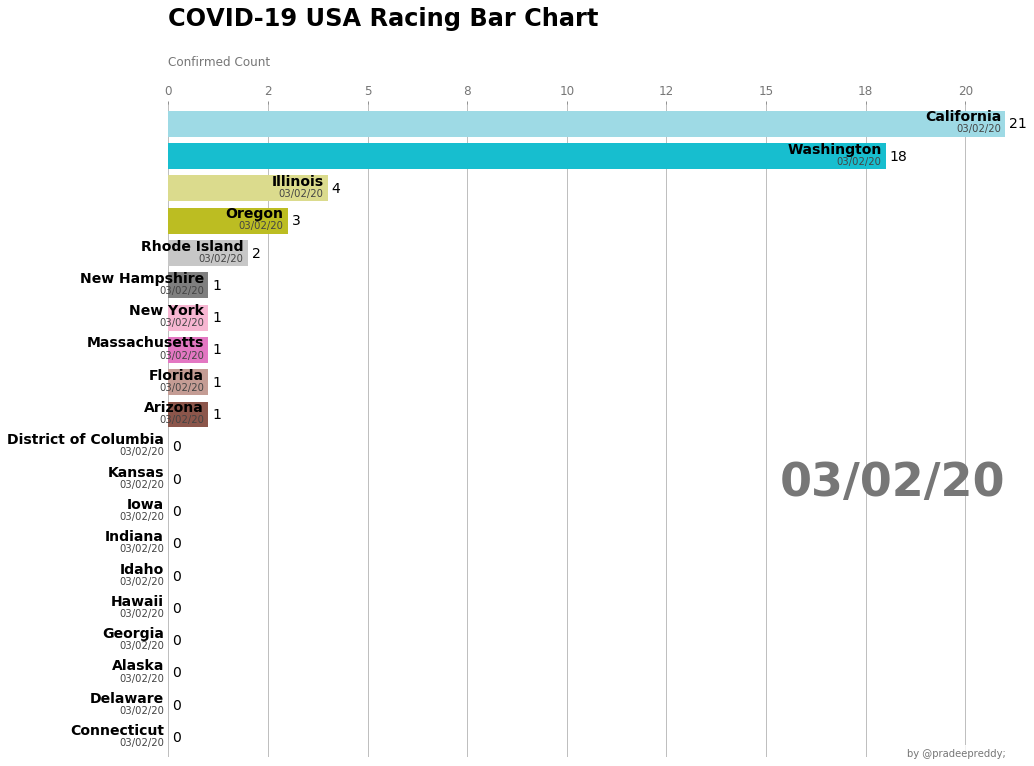

In [16]:
import os
os.chdir('/tmp/')
from datetime import date, timedelta
import datetime

us_covid_pdf=ingest_refine_usa()

fig, ax = plt.subplots(figsize=(15, 12))
sdate = date(2020, 3, 2)   # start date
edate = datetime.date.today() #+datetime.timedelta(days = 1)   # end date
periods = (edate - sdate).days       # as timedelta
rng = pd.date_range(sdate,periods=periods, freq='d').strftime('%m/%d/%y')
animator = animation.FuncAnimation(fig, draw_barchart, frames=rng,interval=800,repeat=False,
                                   fargs=("Date","Confirmed","State",us_covid_pdf,20,"COVID-19 USA Racing Bar Chart"))
HTML(animator.to_jshtml())

In [17]:
import plotly.express as px
fig = px.scatter(us_covid_pdf[us_covid_pdf['DateTime']>'03/02/2020'], x="Deaths", y="Active", animation_frame="Date", animation_group="State",
           size="Confirmed", color="State", hover_name="State", 
           range_x=[-10,100], 
           #range_y=[-10,15000],
           log_x=False,log_y=True,
           height=800,
           #width=800
           size_max=150)
fig.update_layout(transition = {'duration': 500})
fig.update_layout( autosize=True )
fig

In [86]:
fig = px.scatter_mapbox(us_covid_pdf[us_covid_pdf['DateTime']>'03/02/2020'], lat="latitude",lon="longitude", animation_frame="Date", animation_group="State", hover_data=["State","Confirmed","Deaths","Recovered"],  size="Confirmed",  
                   color='State',size_max=100, zoom=2.8)
  
#"open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner" or "stamen-watercolor"                
fig.update_layout(mapbox_style="open-street-map")
fig